# Classifier on CIFAR10

## Using 3-Layer MLP

In [1]:
import tensorflow as tf
import numpy as np

from keras.datasets import cifar10
from keras.utils import np_utils
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Activation, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical, plot_model




Using TensorFlow backend.


In [2]:
# load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
num_labels = len(np.unique(y_train))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

image_size = x_train.shape[1]
input_size = image_size * image_size * 3

# resize and normalize
x_train = np.reshape(x_train, [-1, input_size]) 
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [3]:
# hyper-parameters
batch_size = 256
n_units = 256
epochs = 3

In [4]:
# model is a 3-layer MLP
model = Sequential(name='3-layer-MLP')
model.add(Dense(n_units, input_dim=input_size, activation='relu', name='input_layer'))
model.add(Dense(n_units, activation='relu', name='hidden_layer'))
model.add(Dense(num_labels, activation='softmax', name='output_layer'))
model.summary()

Model: "3-layer-MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 256)               786688    
_________________________________________________________________
hidden_layer (Dense)         (None, 256)               65792     
_________________________________________________________________
output_layer (Dense)         (None, 10)                2570      
Total params: 855,050
Trainable params: 855,050
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)

loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)

print("\nTest accuracy: %.1f%%" % (100.0 * acc))


Epoch 1/3


  1/196 [..............................] - ETA: 0s - loss: 2.4057 - accuracy: 0.0898

  5/196 [..............................] - ETA: 2s - loss: 2.3437 - accuracy: 0.1164

  9/196 [>.............................] - ETA: 2s - loss: 2.3183 - accuracy: 0.1276

 12/196 [>.............................] - ETA: 2s - loss: 2.3082 - accuracy: 0.1335

 16/196 [=>............................] - ETA: 2s - loss: 2.2961 - accuracy: 0.1411

 20/196 [==>...........................] - ETA: 2s - loss: 2.2853 - accuracy: 0.1502

 23/196 [==>...........................] - ETA: 2s - loss: 2.2784 - accuracy: 0.1542

 27/196 [===>..........................] - ETA: 2s - loss: 2.2690 - accuracy: 0.1596

 30/196 [===>..........................] - ETA: 2s - loss: 2.2637 - accuracy: 0.1629

 34/196 [====>.........................] - ETA: 2s - loss: 2.2549 - accuracy: 0.1695

 37/196 [====>.........................] - ETA: 2s - loss: 2.2494 - accuracy: 0.1729

 41/196 [=====>........................] - ETA: 2s - loss: 2.2423 - accuracy: 0.1794

 45/196 [=====>........................] - ETA: 2s - loss: 2.2353 - accuracy: 0.1824

 49/196 [======>.......................] - ETA: 2s - loss: 2.2281 - accuracy: 0.1886

 51/196 [======>.......................] - ETA: 2s - loss: 2.2245 - accuracy: 0.1910

 53/196 [=======>......................] - ETA: 2s - loss: 2.2213 - accuracy: 0.1929

 56/196 [=======>......................] - ETA: 2s - loss: 2.2164 - accuracy: 0.1950

 60/196 [========>.....................] - ETA: 2s - loss: 2.2108 - accuracy: 0.1982

 64/196 [========>.....................] - ETA: 2s - loss: 2.2064 - accuracy: 0.2004

 67/196 [=========>....................] - ETA: 2s - loss: 2.2015 - accuracy: 0.2041

 70/196 [=========>....................] - ETA: 2s - loss: 2.1973 - accuracy: 0.2060

 73/196 [==========>...................] - ETA: 2s - loss: 2.1933 - accuracy: 0.2082

 76/196 [==========>...................] - ETA: 2s - loss: 2.1891 - accuracy: 0.2098

 80/196 [===========>..................] - ETA: 2s - loss: 2.1853 - accuracy: 0.2112

 83/196 [===========>..................] - ETA: 2s - loss: 2.1820 - accuracy: 0.2128

 86/196 [============>.................] - ETA: 1s - loss: 2.1775 - accuracy: 0.2156

 89/196 [============>.................] - ETA: 1s - loss: 2.1741 - accuracy: 0.2174

 92/196 [=============>................] - ETA: 1s - loss: 2.1709 - accuracy: 0.2192

 95/196 [=============>................] - ETA: 1s - loss: 2.1667 - accuracy: 0.2206

 98/196 [==============>...............] - ETA: 1s - loss: 2.1624 - accuracy: 0.2218

101/196 [==============>...............] - ETA: 1s - loss: 2.1595 - accuracy: 0.2232

104/196 [==============>...............] - ETA: 1s - loss: 2.1559 - accuracy: 0.2246

107/196 [===============>..............] - ETA: 1s - loss: 2.1522 - accuracy: 0.2267

110/196 [===============>..............] - ETA: 1s - loss: 2.1493 - accuracy: 0.2276

113/196 [================>.............] - ETA: 1s - loss: 2.1462 - accuracy: 0.2290

116/196 [================>.............] - ETA: 1s - loss: 2.1428 - accuracy: 0.2306

119/196 [=================>............] - ETA: 1s - loss: 2.1402 - accuracy: 0.2313

123/196 [=================>............] - ETA: 1s - loss: 2.1366 - accuracy: 0.2334

127/196 [==================>...........] - ETA: 1s - loss: 2.1329 - accuracy: 0.2352

129/196 [==================>...........] - ETA: 1s - loss: 2.1314 - accuracy: 0.2355

131/196 [===================>..........] - ETA: 1s - loss: 2.1299 - accuracy: 0.2359

134/196 [===================>..........] - ETA: 1s - loss: 2.1267 - accuracy: 0.2382

137/196 [===================>..........] - ETA: 1s - loss: 2.1245 - accuracy: 0.2390

140/196 [====================>.........] - ETA: 1s - loss: 2.1214 - accuracy: 0.2403

144/196 [=====================>........] - ETA: 0s - loss: 2.1181 - accuracy: 0.2413

147/196 [=====================>........] - ETA: 0s - loss: 2.1154 - accuracy: 0.2424

150/196 [=====================>........] - ETA: 0s - loss: 2.1128 - accuracy: 0.2433

154/196 [======================>.......] - ETA: 0s - loss: 2.1095 - accuracy: 0.2446

158/196 [=======================>......] - ETA: 0s - loss: 2.1064 - accuracy: 0.2464

161/196 [=======================>......] - ETA: 0s - loss: 2.1042 - accuracy: 0.2470

165/196 [========================>.....] - ETA: 0s - loss: 2.1013 - accuracy: 0.2480

169/196 [========================>.....] - ETA: 0s - loss: 2.0985 - accuracy: 0.2491

172/196 [=========================>....] - ETA: 0s - loss: 2.0964 - accuracy: 0.2503

174/196 [=========================>....] - ETA: 0s - loss: 2.0948 - accuracy: 0.2509

176/196 [=========================>....] - ETA: 0s - loss: 2.0936 - accuracy: 0.2514

178/196 [==========================>...] - ETA: 0s - loss: 2.0918 - accuracy: 0.2520

181/196 [==========================>...] - ETA: 0s - loss: 2.0892 - accuracy: 0.2530

185/196 [===========================>..] - ETA: 0s - loss: 2.0861 - accuracy: 0.2543

189/196 [===========================>..] - ETA: 0s - loss: 2.0840 - accuracy: 0.2549

193/196 [============================>.] - ETA: 0s - loss: 2.0820 - accuracy: 0.2559

196/196 [==============================] - 4s 22ms/step - loss: 2.0806 - accuracy: 0.2565 - val_loss: 1.9707 - val_accuracy: 0.3123


Epoch 2/3
  1/196 [..............................] - ETA: 0s - loss: 1.9557 - accuracy: 0.3242

  5/196 [..............................] - ETA: 2s - loss: 1.9704 - accuracy: 0.2984

  9/196 [>.............................] - ETA: 2s - loss: 1.9666 - accuracy: 0.2982

 12/196 [>.............................] - ETA: 2s - loss: 1.9625 - accuracy: 0.2962

 15/196 [=>............................] - ETA: 2s - loss: 1.9627 - accuracy: 0.2979

 19/196 [=>............................] - ETA: 2s - loss: 1.9504 - accuracy: 0.3069

 23/196 [==>...........................] - ETA: 2s - loss: 1.9439 - accuracy: 0.3084

 27/196 [===>..........................] - ETA: 2s - loss: 1.9416 - accuracy: 0.3139

 28/196 [===>..........................] - ETA: 2s - loss: 1.9427 - accuracy: 0.3143

 31/196 [===>..........................] - ETA: 2s - loss: 1.9406 - accuracy: 0.3155

 35/196 [====>.........................] - ETA: 2s - loss: 1.9409 - accuracy: 0.3174

 39/196 [====>.........................] - ETA: 2s - loss: 1.9442 - accuracy: 0.3152

 43/196 [=====>........................] - ETA: 2s - loss: 1.9399 - accuracy: 0.3168

 47/196 [======>.......................] - ETA: 2s - loss: 1.9418 - accuracy: 0.3164

 51/196 [======>.......................] - ETA: 2s - loss: 1.9406 - accuracy: 0.3171

 55/196 [=======>......................] - ETA: 2s - loss: 1.9386 - accuracy: 0.3180

 59/196 [========>.....................] - ETA: 2s - loss: 1.9365 - accuracy: 0.3203

 62/196 [========>.....................] - ETA: 2s - loss: 1.9352 - accuracy: 0.3211

 66/196 [=========>....................] - ETA: 2s - loss: 1.9345 - accuracy: 0.3221

 69/196 [=========>....................] - ETA: 2s - loss: 1.9327 - accuracy: 0.3229

 73/196 [==========>...................] - ETA: 2s - loss: 1.9313 - accuracy: 0.3226

 77/196 [==========>...................] - ETA: 1s - loss: 1.9299 - accuracy: 0.3234

 81/196 [===========>..................] - ETA: 1s - loss: 1.9288 - accuracy: 0.3234

 85/196 [============>.................] - ETA: 1s - loss: 1.9279 - accuracy: 0.3240

 89/196 [============>.................] - ETA: 1s - loss: 1.9272 - accuracy: 0.3239

 92/196 [=============>................] - ETA: 1s - loss: 1.9274 - accuracy: 0.3239

 95/196 [=============>................] - ETA: 1s - loss: 1.9267 - accuracy: 0.3242

 99/196 [==============>...............] - ETA: 1s - loss: 1.9253 - accuracy: 0.3247

103/196 [==============>...............] - ETA: 1s - loss: 1.9242 - accuracy: 0.3253

107/196 [===============>..............] - ETA: 1s - loss: 1.9239 - accuracy: 0.3253

111/196 [===============>..............] - ETA: 1s - loss: 1.9229 - accuracy: 0.3249

115/196 [================>.............] - ETA: 1s - loss: 1.9227 - accuracy: 0.3244

118/196 [=================>............] - ETA: 1s - loss: 1.9221 - accuracy: 0.3242

121/196 [=================>............] - ETA: 1s - loss: 1.9221 - accuracy: 0.3244

124/196 [=================>............] - ETA: 1s - loss: 1.9210 - accuracy: 0.3249

128/196 [==================>...........] - ETA: 1s - loss: 1.9187 - accuracy: 0.3254

132/196 [===================>..........] - ETA: 1s - loss: 1.9177 - accuracy: 0.3260

136/196 [===================>..........] - ETA: 0s - loss: 1.9167 - accuracy: 0.3264

139/196 [====================>.........] - ETA: 0s - loss: 1.9148 - accuracy: 0.3273

142/196 [====================>.........] - ETA: 0s - loss: 1.9144 - accuracy: 0.3274

144/196 [=====================>........] - ETA: 0s - loss: 1.9137 - accuracy: 0.3278

148/196 [=====================>........] - ETA: 0s - loss: 1.9130 - accuracy: 0.3277

151/196 [======================>.......] - ETA: 0s - loss: 1.9117 - accuracy: 0.3282

154/196 [======================>.......] - ETA: 0s - loss: 1.9108 - accuracy: 0.3287

158/196 [=======================>......] - ETA: 0s - loss: 1.9102 - accuracy: 0.3289

162/196 [=======================>......] - ETA: 0s - loss: 1.9096 - accuracy: 0.3287

165/196 [========================>.....] - ETA: 0s - loss: 1.9088 - accuracy: 0.3286

169/196 [========================>.....] - ETA: 0s - loss: 1.9079 - accuracy: 0.3290

173/196 [=========================>....] - ETA: 0s - loss: 1.9081 - accuracy: 0.3288

177/196 [==========================>...] - ETA: 0s - loss: 1.9075 - accuracy: 0.3289

180/196 [==========================>...] - ETA: 0s - loss: 1.9074 - accuracy: 0.3291

183/196 [===========================>..] - ETA: 0s - loss: 1.9067 - accuracy: 0.3291

187/196 [===========================>..] - ETA: 0s - loss: 1.9054 - accuracy: 0.3298

191/196 [============================>.] - ETA: 0s - loss: 1.9044 - accuracy: 0.3307

195/196 [============================>.] - ETA: 0s - loss: 1.9037 - accuracy: 0.3307

196/196 [==============================] - 4s 18ms/step - loss: 1.9035 - accuracy: 0.3309 - val_loss: 1.9086 - val_accuracy: 0.3181


Epoch 3/3
  1/196 [..............................] - ETA: 0s - loss: 1.8996 - accuracy: 0.3125

  5/196 [..............................] - ETA: 2s - loss: 1.8397 - accuracy: 0.3406

  8/196 [>.............................] - ETA: 2s - loss: 1.8269 - accuracy: 0.3540

 12/196 [>.............................] - ETA: 2s - loss: 1.8372 - accuracy: 0.3525

 16/196 [=>............................] - ETA: 2s - loss: 1.8420 - accuracy: 0.3550

 19/196 [=>............................] - ETA: 2s - loss: 1.8401 - accuracy: 0.3598

 23/196 [==>...........................] - ETA: 2s - loss: 1.8433 - accuracy: 0.3587

 26/196 [==>...........................] - ETA: 2s - loss: 1.8450 - accuracy: 0.3573

 30/196 [===>..........................] - ETA: 2s - loss: 1.8432 - accuracy: 0.3559

 33/196 [====>.........................] - ETA: 2s - loss: 1.8411 - accuracy: 0.3557

 37/196 [====>.........................] - ETA: 2s - loss: 1.8421 - accuracy: 0.3555

 41/196 [=====>........................] - ETA: 2s - loss: 1.8422 - accuracy: 0.3562

 45/196 [=====>........................] - ETA: 2s - loss: 1.8417 - accuracy: 0.3568

 49/196 [======>.......................] - ETA: 2s - loss: 1.8398 - accuracy: 0.3573

 52/196 [======>.......................] - ETA: 2s - loss: 1.8419 - accuracy: 0.3564

 55/196 [=======>......................] - ETA: 2s - loss: 1.8444 - accuracy: 0.3567

 58/196 [=======>......................] - ETA: 2s - loss: 1.8456 - accuracy: 0.3576

 62/196 [========>.....................] - ETA: 2s - loss: 1.8473 - accuracy: 0.3555

 65/196 [========>.....................] - ETA: 2s - loss: 1.8495 - accuracy: 0.3541

 66/196 [=========>....................] - ETA: 2s - loss: 1.8492 - accuracy: 0.3539

 70/196 [=========>....................] - ETA: 2s - loss: 1.8496 - accuracy: 0.3541

 73/196 [==========>...................] - ETA: 2s - loss: 1.8505 - accuracy: 0.3538

 77/196 [==========>...................] - ETA: 2s - loss: 1.8489 - accuracy: 0.3537

 80/196 [===========>..................] - ETA: 1s - loss: 1.8493 - accuracy: 0.3539

 83/196 [===========>..................] - ETA: 1s - loss: 1.8473 - accuracy: 0.3548

 86/196 [============>.................] - ETA: 1s - loss: 1.8473 - accuracy: 0.3541

 89/196 [============>.................] - ETA: 1s - loss: 1.8470 - accuracy: 0.3538

 92/196 [=============>................] - ETA: 1s - loss: 1.8470 - accuracy: 0.3543

 95/196 [=============>................] - ETA: 1s - loss: 1.8461 - accuracy: 0.3550

 98/196 [==============>...............] - ETA: 1s - loss: 1.8449 - accuracy: 0.3555

101/196 [==============>...............] - ETA: 1s - loss: 1.8454 - accuracy: 0.3550

105/196 [===============>..............] - ETA: 1s - loss: 1.8454 - accuracy: 0.3545

108/196 [===============>..............] - ETA: 1s - loss: 1.8443 - accuracy: 0.3550

111/196 [===============>..............] - ETA: 1s - loss: 1.8434 - accuracy: 0.3551

114/196 [================>.............] - ETA: 1s - loss: 1.8427 - accuracy: 0.3548

117/196 [================>.............] - ETA: 1s - loss: 1.8414 - accuracy: 0.3550

120/196 [=================>............] - ETA: 1s - loss: 1.8413 - accuracy: 0.3552

124/196 [=================>............] - ETA: 1s - loss: 1.8411 - accuracy: 0.3558

127/196 [==================>...........] - ETA: 1s - loss: 1.8413 - accuracy: 0.3553

131/196 [===================>..........] - ETA: 1s - loss: 1.8410 - accuracy: 0.3556

134/196 [===================>..........] - ETA: 1s - loss: 1.8412 - accuracy: 0.3554

138/196 [====================>.........] - ETA: 1s - loss: 1.8417 - accuracy: 0.3550

141/196 [====================>.........] - ETA: 0s - loss: 1.8417 - accuracy: 0.3552

144/196 [=====================>........] - ETA: 0s - loss: 1.8410 - accuracy: 0.3554

146/196 [=====================>........] - ETA: 0s - loss: 1.8409 - accuracy: 0.3553

150/196 [=====================>........] - ETA: 0s - loss: 1.8400 - accuracy: 0.3551

153/196 [======================>.......] - ETA: 0s - loss: 1.8403 - accuracy: 0.3551

156/196 [======================>.......] - ETA: 0s - loss: 1.8392 - accuracy: 0.3556

159/196 [=======================>......] - ETA: 0s - loss: 1.8387 - accuracy: 0.3556

162/196 [=======================>......] - ETA: 0s - loss: 1.8398 - accuracy: 0.3551

165/196 [========================>.....] - ETA: 0s - loss: 1.8402 - accuracy: 0.3549

168/196 [========================>.....] - ETA: 0s - loss: 1.8384 - accuracy: 0.3551

172/196 [=========================>....] - ETA: 0s - loss: 1.8372 - accuracy: 0.3558

175/196 [=========================>....] - ETA: 0s - loss: 1.8366 - accuracy: 0.3560

178/196 [==========================>...] - ETA: 0s - loss: 1.8364 - accuracy: 0.3561

181/196 [==========================>...] - ETA: 0s - loss: 1.8361 - accuracy: 0.3563

185/196 [===========================>..] - ETA: 0s - loss: 1.8361 - accuracy: 0.3564

189/196 [===========================>..] - ETA: 0s - loss: 1.8354 - accuracy: 0.3567

192/196 [============================>.] - ETA: 0s - loss: 1.8353 - accuracy: 0.3565

195/196 [============================>.] - ETA: 0s - loss: 1.8355 - accuracy: 0.3563

196/196 [==============================] - 4s 19ms/step - loss: 1.8355 - accuracy: 0.3564 - val_loss: 1.8325 - val_accuracy: 0.3507


 1/40 [..............................] - ETA: 0s - loss: 1.8548 - accuracy: 0.3477

 8/40 [=====>........................] - ETA: 0s - loss: 1.8358 - accuracy: 0.3555

14/40 [=========>....................] - ETA: 0s - loss: 1.8349 - accuracy: 0.3566

21/40 [==============>...............] - ETA: 0s - loss: 1.8312 - accuracy: 0.3583

28/40 [====================>.........] - ETA: 0s - loss: 1.8364 - accuracy: 0.3531

35/40 [=========================>....] - ETA: 0s - loss: 1.8335 - accuracy: 0.3517

40/40 [==============================] - 0s 7ms/step - loss: 1.8325 - accuracy: 0.3507



Test accuracy: 35.1%


## Using 3-Layer CNN

In [6]:
# load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [7]:
# input image dimensions
image_size = x_train.shape[1]
# resize and normalize
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# network parameters
input_shape = (image_size, image_size, 3)
batch_size = 256
kernel_size = 3
pool_size = 3
filters = 32

In [8]:
model = Sequential()
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size, 
                 activation='relu', 
                 kernel_initializer='he_uniform', 
                 padding='same', 
                 input_shape=input_shape,
                 name='input_layer'))

model.add(MaxPooling2D(pool_size,name='hidden_layer'))
model.add(Flatten(name='hidden_layer2'))
model.add(Dense(10, activation='softmax',name='output_layer'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Conv2D)         (None, 32, 32, 32)        896       
_________________________________________________________________
hidden_layer (MaxPooling2D)  (None, 10, 10, 32)        0         
_________________________________________________________________
hidden_layer2 (Flatten)      (None, 3200)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                32010     
Total params: 32,906
Trainable params: 32,906
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
# train the network
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,verbose=1)

loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/3


  1/196 [..............................] - ETA: 0s - loss: 2.4575 - accuracy: 0.0508

  2/196 [..............................] - ETA: 11s - loss: 2.4104 - accuracy: 0.0703

  3/196 [..............................] - ETA: 15s - loss: 2.3836 - accuracy: 0.0768

  4/196 [..............................] - ETA: 17s - loss: 2.3769 - accuracy: 0.0908

  5/196 [..............................] - ETA: 18s - loss: 2.3627 - accuracy: 0.0945

  6/196 [..............................] - ETA: 18s - loss: 2.3631 - accuracy: 0.0990

  7/196 [>.............................] - ETA: 18s - loss: 2.3568 - accuracy: 0.0999

  8/196 [>.............................] - ETA: 18s - loss: 2.3514 - accuracy: 0.1011

  9/196 [>.............................] - ETA: 18s - loss: 2.3511 - accuracy: 0.1011

 10/196 [>.............................] - ETA: 18s - loss: 2.3455 - accuracy: 0.1020

 11/196 [>.............................] - ETA: 18s - loss: 2.3419 - accuracy: 0.1058

 12/196 [>.............................] - ETA: 17s - loss: 2.3391 - accuracy: 0.1061

 13/196 [>.............................] - ETA: 17s - loss: 2.3355 - accuracy: 0.1094

 14/196 [=>............................] - ETA: 17s - loss: 2.3325 - accuracy: 0.1102

 15/196 [=>............................] - ETA: 17s - loss: 2.3295 - accuracy: 0.1133

 16/196 [=>............................] - ETA: 17s - loss: 2.3259 - accuracy: 0.1147

 17/196 [=>............................] - ETA: 17s - loss: 2.3230 - accuracy: 0.1158

 18/196 [=>............................] - ETA: 17s - loss: 2.3174 - accuracy: 0.1204

 19/196 [=>............................] - ETA: 17s - loss: 2.3150 - accuracy: 0.1234

 20/196 [==>...........................] - ETA: 17s - loss: 2.3086 - accuracy: 0.1285

 21/196 [==>...........................] - ETA: 17s - loss: 2.3062 - accuracy: 0.1304

 22/196 [==>...........................] - ETA: 17s - loss: 2.3026 - accuracy: 0.1332

 23/196 [==>...........................] - ETA: 17s - loss: 2.2993 - accuracy: 0.1359

 24/196 [==>...........................] - ETA: 17s - loss: 2.2963 - accuracy: 0.1364

 25/196 [==>...........................] - ETA: 17s - loss: 2.2949 - accuracy: 0.1359

 26/196 [==>...........................] - ETA: 16s - loss: 2.2916 - accuracy: 0.1373

 27/196 [===>..........................] - ETA: 16s - loss: 2.2884 - accuracy: 0.1393

 28/196 [===>..........................] - ETA: 16s - loss: 2.2852 - accuracy: 0.1408

 29/196 [===>..........................] - ETA: 16s - loss: 2.2815 - accuracy: 0.1429

 30/196 [===>..........................] - ETA: 16s - loss: 2.2787 - accuracy: 0.1447

 31/196 [===>..........................] - ETA: 16s - loss: 2.2762 - accuracy: 0.1460

 32/196 [===>..........................] - ETA: 16s - loss: 2.2741 - accuracy: 0.1481

 33/196 [====>.........................] - ETA: 16s - loss: 2.2714 - accuracy: 0.1490

 34/196 [====>.........................] - ETA: 16s - loss: 2.2701 - accuracy: 0.1505

 35/196 [====>.........................] - ETA: 15s - loss: 2.2674 - accuracy: 0.1526

 36/196 [====>.........................] - ETA: 15s - loss: 2.2651 - accuracy: 0.1533

 37/196 [====>.........................] - ETA: 15s - loss: 2.2616 - accuracy: 0.1560

 38/196 [====>.........................] - ETA: 15s - loss: 2.2595 - accuracy: 0.1577

 39/196 [====>.........................] - ETA: 15s - loss: 2.2568 - accuracy: 0.1597

 40/196 [=====>........................] - ETA: 15s - loss: 2.2546 - accuracy: 0.1611

 41/196 [=====>........................] - ETA: 15s - loss: 2.2513 - accuracy: 0.1640

 42/196 [=====>........................] - ETA: 15s - loss: 2.2495 - accuracy: 0.1650

 43/196 [=====>........................] - ETA: 15s - loss: 2.2477 - accuracy: 0.1662

 44/196 [=====>........................] - ETA: 15s - loss: 2.2461 - accuracy: 0.1673

 45/196 [=====>........................] - ETA: 15s - loss: 2.2436 - accuracy: 0.1690

 46/196 [======>.......................] - ETA: 15s - loss: 2.2413 - accuracy: 0.1703

 47/196 [======>.......................] - ETA: 14s - loss: 2.2406 - accuracy: 0.1704

 48/196 [======>.......................] - ETA: 14s - loss: 2.2387 - accuracy: 0.1717

 49/196 [======>.......................] - ETA: 14s - loss: 2.2364 - accuracy: 0.1728

 50/196 [======>.......................] - ETA: 14s - loss: 2.2350 - accuracy: 0.1734

 51/196 [======>.......................] - ETA: 14s - loss: 2.2327 - accuracy: 0.1750

 52/196 [======>.......................] - ETA: 14s - loss: 2.2313 - accuracy: 0.1762

 53/196 [=======>......................] - ETA: 14s - loss: 2.2292 - accuracy: 0.1775

 54/196 [=======>......................] - ETA: 14s - loss: 2.2273 - accuracy: 0.1790

 55/196 [=======>......................] - ETA: 14s - loss: 2.2258 - accuracy: 0.1798

 56/196 [=======>......................] - ETA: 14s - loss: 2.2248 - accuracy: 0.1807

 57/196 [=======>......................] - ETA: 13s - loss: 2.2229 - accuracy: 0.1823

 58/196 [=======>......................] - ETA: 13s - loss: 2.2215 - accuracy: 0.1833

 59/196 [========>.....................] - ETA: 13s - loss: 2.2192 - accuracy: 0.1847

 60/196 [========>.....................] - ETA: 13s - loss: 2.2169 - accuracy: 0.1863

 61/196 [========>.....................] - ETA: 13s - loss: 2.2155 - accuracy: 0.1874

 62/196 [========>.....................] - ETA: 13s - loss: 2.2130 - accuracy: 0.1889

 63/196 [========>.....................] - ETA: 13s - loss: 2.2118 - accuracy: 0.1895

 64/196 [========>.....................] - ETA: 13s - loss: 2.2096 - accuracy: 0.1913

 65/196 [========>.....................] - ETA: 13s - loss: 2.2078 - accuracy: 0.1918

 66/196 [=========>....................] - ETA: 12s - loss: 2.2060 - accuracy: 0.1930

 67/196 [=========>....................] - ETA: 12s - loss: 2.2041 - accuracy: 0.1946

 68/196 [=========>....................] - ETA: 12s - loss: 2.2034 - accuracy: 0.1945

 69/196 [=========>....................] - ETA: 12s - loss: 2.2019 - accuracy: 0.1954

 70/196 [=========>....................] - ETA: 12s - loss: 2.2009 - accuracy: 0.1958

 71/196 [=========>....................] - ETA: 12s - loss: 2.2001 - accuracy: 0.1958

 72/196 [==========>...................] - ETA: 12s - loss: 2.1985 - accuracy: 0.1975

 73/196 [==========>...................] - ETA: 12s - loss: 2.1970 - accuracy: 0.1990

 74/196 [==========>...................] - ETA: 12s - loss: 2.1957 - accuracy: 0.2000

 75/196 [==========>...................] - ETA: 12s - loss: 2.1939 - accuracy: 0.2011

 76/196 [==========>...................] - ETA: 11s - loss: 2.1930 - accuracy: 0.2017

 77/196 [==========>...................] - ETA: 11s - loss: 2.1911 - accuracy: 0.2033

 78/196 [==========>...................] - ETA: 11s - loss: 2.1902 - accuracy: 0.2036

 79/196 [===========>..................] - ETA: 11s - loss: 2.1887 - accuracy: 0.2045

 80/196 [===========>..................] - ETA: 11s - loss: 2.1874 - accuracy: 0.2055

 81/196 [===========>..................] - ETA: 11s - loss: 2.1865 - accuracy: 0.2058

 82/196 [===========>..................] - ETA: 11s - loss: 2.1847 - accuracy: 0.2064

 83/196 [===========>..................] - ETA: 11s - loss: 2.1830 - accuracy: 0.2075

 84/196 [===========>..................] - ETA: 11s - loss: 2.1819 - accuracy: 0.2085

 85/196 [============>.................] - ETA: 11s - loss: 2.1807 - accuracy: 0.2086

 86/196 [============>.................] - ETA: 10s - loss: 2.1788 - accuracy: 0.2097

 87/196 [============>.................] - ETA: 10s - loss: 2.1771 - accuracy: 0.2104

 88/196 [============>.................] - ETA: 10s - loss: 2.1758 - accuracy: 0.2112

 89/196 [============>.................] - ETA: 10s - loss: 2.1749 - accuracy: 0.2118

 90/196 [============>.................] - ETA: 10s - loss: 2.1744 - accuracy: 0.2122

 91/196 [============>.................] - ETA: 10s - loss: 2.1732 - accuracy: 0.2136

 92/196 [=============>................] - ETA: 10s - loss: 2.1725 - accuracy: 0.2138

 93/196 [=============>................] - ETA: 10s - loss: 2.1712 - accuracy: 0.2150

 94/196 [=============>................] - ETA: 10s - loss: 2.1706 - accuracy: 0.2153

 95/196 [=============>................] - ETA: 10s - loss: 2.1686 - accuracy: 0.2164

 96/196 [=============>................] - ETA: 9s - loss: 2.1679 - accuracy: 0.2165 

 97/196 [=============>................] - ETA: 9s - loss: 2.1664 - accuracy: 0.2177

 98/196 [==============>...............] - ETA: 9s - loss: 2.1650 - accuracy: 0.2185

 99/196 [==============>...............] - ETA: 9s - loss: 2.1639 - accuracy: 0.2187

100/196 [==============>...............] - ETA: 9s - loss: 2.1631 - accuracy: 0.2189

101/196 [==============>...............] - ETA: 9s - loss: 2.1620 - accuracy: 0.2194

102/196 [==============>...............] - ETA: 9s - loss: 2.1610 - accuracy: 0.2201

103/196 [==============>...............] - ETA: 9s - loss: 2.1602 - accuracy: 0.2208

104/196 [==============>...............] - ETA: 9s - loss: 2.1592 - accuracy: 0.2213

105/196 [===============>..............] - ETA: 9s - loss: 2.1584 - accuracy: 0.2217

106/196 [===============>..............] - ETA: 9s - loss: 2.1572 - accuracy: 0.2224

107/196 [===============>..............] - ETA: 8s - loss: 2.1559 - accuracy: 0.2233

108/196 [===============>..............] - ETA: 8s - loss: 2.1549 - accuracy: 0.2239

109/196 [===============>..............] - ETA: 8s - loss: 2.1531 - accuracy: 0.2246

110/196 [===============>..............] - ETA: 8s - loss: 2.1517 - accuracy: 0.2255

111/196 [===============>..............] - ETA: 8s - loss: 2.1500 - accuracy: 0.2263

112/196 [================>.............] - ETA: 8s - loss: 2.1484 - accuracy: 0.2269

113/196 [================>.............] - ETA: 8s - loss: 2.1473 - accuracy: 0.2275

114/196 [================>.............] - ETA: 8s - loss: 2.1464 - accuracy: 0.2279

115/196 [================>.............] - ETA: 8s - loss: 2.1454 - accuracy: 0.2284

116/196 [================>.............] - ETA: 8s - loss: 2.1441 - accuracy: 0.2290

117/196 [================>.............] - ETA: 7s - loss: 2.1428 - accuracy: 0.2296

118/196 [=================>............] - ETA: 7s - loss: 2.1421 - accuracy: 0.2299

119/196 [=================>............] - ETA: 7s - loss: 2.1409 - accuracy: 0.2305

120/196 [=================>............] - ETA: 7s - loss: 2.1396 - accuracy: 0.2308

121/196 [=================>............] - ETA: 7s - loss: 2.1385 - accuracy: 0.2311

122/196 [=================>............] - ETA: 7s - loss: 2.1372 - accuracy: 0.2321

123/196 [=================>............] - ETA: 7s - loss: 2.1361 - accuracy: 0.2329

124/196 [=================>............] - ETA: 7s - loss: 2.1349 - accuracy: 0.2338

125/196 [==================>...........] - ETA: 7s - loss: 2.1339 - accuracy: 0.2343

126/196 [==================>...........] - ETA: 6s - loss: 2.1326 - accuracy: 0.2349

127/196 [==================>...........] - ETA: 6s - loss: 2.1318 - accuracy: 0.2354

128/196 [==================>...........] - ETA: 6s - loss: 2.1313 - accuracy: 0.2360

129/196 [==================>...........] - ETA: 6s - loss: 2.1300 - accuracy: 0.2366

130/196 [==================>...........] - ETA: 6s - loss: 2.1285 - accuracy: 0.2372

131/196 [===================>..........] - ETA: 6s - loss: 2.1276 - accuracy: 0.2375

132/196 [===================>..........] - ETA: 6s - loss: 2.1266 - accuracy: 0.2380

133/196 [===================>..........] - ETA: 6s - loss: 2.1257 - accuracy: 0.2383

134/196 [===================>..........] - ETA: 6s - loss: 2.1248 - accuracy: 0.2384

135/196 [===================>..........] - ETA: 6s - loss: 2.1238 - accuracy: 0.2389

136/196 [===================>..........] - ETA: 5s - loss: 2.1222 - accuracy: 0.2398

137/196 [===================>..........] - ETA: 5s - loss: 2.1215 - accuracy: 0.2403

138/196 [====================>.........] - ETA: 5s - loss: 2.1202 - accuracy: 0.2411

139/196 [====================>.........] - ETA: 5s - loss: 2.1194 - accuracy: 0.2416

140/196 [====================>.........] - ETA: 5s - loss: 2.1182 - accuracy: 0.2422

141/196 [====================>.........] - ETA: 5s - loss: 2.1174 - accuracy: 0.2427

142/196 [====================>.........] - ETA: 5s - loss: 2.1168 - accuracy: 0.2429

143/196 [====================>.........] - ETA: 5s - loss: 2.1158 - accuracy: 0.2435

144/196 [=====================>........] - ETA: 5s - loss: 2.1152 - accuracy: 0.2437

145/196 [=====================>........] - ETA: 5s - loss: 2.1147 - accuracy: 0.2438

146/196 [=====================>........] - ETA: 4s - loss: 2.1136 - accuracy: 0.2444

147/196 [=====================>........] - ETA: 4s - loss: 2.1126 - accuracy: 0.2450

148/196 [=====================>........] - ETA: 4s - loss: 2.1116 - accuracy: 0.2458

149/196 [=====================>........] - ETA: 4s - loss: 2.1104 - accuracy: 0.2466

150/196 [=====================>........] - ETA: 4s - loss: 2.1097 - accuracy: 0.2472

151/196 [======================>.......] - ETA: 4s - loss: 2.1085 - accuracy: 0.2479

152/196 [======================>.......] - ETA: 4s - loss: 2.1082 - accuracy: 0.2480

153/196 [======================>.......] - ETA: 4s - loss: 2.1074 - accuracy: 0.2484

154/196 [======================>.......] - ETA: 4s - loss: 2.1062 - accuracy: 0.2489

155/196 [======================>.......] - ETA: 4s - loss: 2.1050 - accuracy: 0.2494

156/196 [======================>.......] - ETA: 3s - loss: 2.1041 - accuracy: 0.2499

157/196 [=======================>......] - ETA: 3s - loss: 2.1032 - accuracy: 0.2503

158/196 [=======================>......] - ETA: 3s - loss: 2.1025 - accuracy: 0.2508

159/196 [=======================>......] - ETA: 3s - loss: 2.1015 - accuracy: 0.2512

160/196 [=======================>......] - ETA: 3s - loss: 2.1005 - accuracy: 0.2516

161/196 [=======================>......] - ETA: 3s - loss: 2.0996 - accuracy: 0.2519

162/196 [=======================>......] - ETA: 3s - loss: 2.0986 - accuracy: 0.2522

163/196 [=======================>......] - ETA: 3s - loss: 2.0980 - accuracy: 0.2527

164/196 [========================>.....] - ETA: 3s - loss: 2.0969 - accuracy: 0.2531

165/196 [========================>.....] - ETA: 3s - loss: 2.0964 - accuracy: 0.2532

166/196 [========================>.....] - ETA: 2s - loss: 2.0956 - accuracy: 0.2535

167/196 [========================>.....] - ETA: 2s - loss: 2.0948 - accuracy: 0.2535

168/196 [========================>.....] - ETA: 2s - loss: 2.0939 - accuracy: 0.2541

169/196 [========================>.....] - ETA: 2s - loss: 2.0931 - accuracy: 0.2546

170/196 [=========================>....] - ETA: 2s - loss: 2.0922 - accuracy: 0.2550

171/196 [=========================>....] - ETA: 2s - loss: 2.0911 - accuracy: 0.2555

172/196 [=========================>....] - ETA: 2s - loss: 2.0903 - accuracy: 0.2559

173/196 [=========================>....] - ETA: 2s - loss: 2.0898 - accuracy: 0.2562

174/196 [=========================>....] - ETA: 2s - loss: 2.0891 - accuracy: 0.2565

175/196 [=========================>....] - ETA: 2s - loss: 2.0886 - accuracy: 0.2570

176/196 [=========================>....] - ETA: 1s - loss: 2.0874 - accuracy: 0.2575

177/196 [==========================>...] - ETA: 1s - loss: 2.0866 - accuracy: 0.2581

178/196 [==========================>...] - ETA: 1s - loss: 2.0860 - accuracy: 0.2583

179/196 [==========================>...] - ETA: 1s - loss: 2.0853 - accuracy: 0.2587

180/196 [==========================>...] - ETA: 1s - loss: 2.0839 - accuracy: 0.2595

181/196 [==========================>...] - ETA: 1s - loss: 2.0829 - accuracy: 0.2600

182/196 [==========================>...] - ETA: 1s - loss: 2.0824 - accuracy: 0.2599

183/196 [===========================>..] - ETA: 1s - loss: 2.0816 - accuracy: 0.2600

184/196 [===========================>..] - ETA: 1s - loss: 2.0806 - accuracy: 0.2601

185/196 [===========================>..] - ETA: 1s - loss: 2.0797 - accuracy: 0.2607

186/196 [===========================>..] - ETA: 0s - loss: 2.0788 - accuracy: 0.2611

187/196 [===========================>..] - ETA: 0s - loss: 2.0779 - accuracy: 0.2614

188/196 [===========================>..] - ETA: 0s - loss: 2.0770 - accuracy: 0.2617

189/196 [===========================>..] - ETA: 0s - loss: 2.0762 - accuracy: 0.2623

190/196 [============================>.] - ETA: 0s - loss: 2.0755 - accuracy: 0.2625

191/196 [============================>.] - ETA: 0s - loss: 2.0749 - accuracy: 0.2628

192/196 [============================>.] - ETA: 0s - loss: 2.0743 - accuracy: 0.2632

193/196 [============================>.] - ETA: 0s - loss: 2.0736 - accuracy: 0.2634

194/196 [============================>.] - ETA: 0s - loss: 2.0728 - accuracy: 0.2638

195/196 [============================>.] - ETA: 0s - loss: 2.0720 - accuracy: 0.2642

196/196 [==============================] - ETA: 0s - loss: 2.0719 - accuracy: 0.2642

196/196 [==============================] - 19s 99ms/step - loss: 2.0719 - accuracy: 0.2642


Epoch 2/3


  1/196 [..............................] - ETA: 0s - loss: 1.9682 - accuracy: 0.2812

  2/196 [..............................] - ETA: 9s - loss: 1.9461 - accuracy: 0.3027

  3/196 [..............................] - ETA: 12s - loss: 1.9451 - accuracy: 0.3099

  4/196 [..............................] - ETA: 13s - loss: 1.9523 - accuracy: 0.3193

  5/196 [..............................] - ETA: 14s - loss: 1.9522 - accuracy: 0.3187

  6/196 [..............................] - ETA: 15s - loss: 1.9487 - accuracy: 0.3190

  7/196 [>.............................] - ETA: 15s - loss: 1.9419 - accuracy: 0.3248

  8/196 [>.............................] - ETA: 15s - loss: 1.9338 - accuracy: 0.3330

  9/196 [>.............................] - ETA: 15s - loss: 1.9353 - accuracy: 0.3281

 10/196 [>.............................] - ETA: 16s - loss: 1.9299 - accuracy: 0.3293

 11/196 [>.............................] - ETA: 16s - loss: 1.9288 - accuracy: 0.3288

 12/196 [>.............................] - ETA: 16s - loss: 1.9245 - accuracy: 0.3346

 13/196 [>.............................] - ETA: 16s - loss: 1.9221 - accuracy: 0.3332

 14/196 [=>............................] - ETA: 16s - loss: 1.9224 - accuracy: 0.3354

 15/196 [=>............................] - ETA: 16s - loss: 1.9213 - accuracy: 0.3344

 16/196 [=>............................] - ETA: 16s - loss: 1.9168 - accuracy: 0.3367

 17/196 [=>............................] - ETA: 16s - loss: 1.9173 - accuracy: 0.3371

 18/196 [=>............................] - ETA: 16s - loss: 1.9171 - accuracy: 0.3368

 19/196 [=>............................] - ETA: 16s - loss: 1.9181 - accuracy: 0.3374

 20/196 [==>...........................] - ETA: 16s - loss: 1.9195 - accuracy: 0.3359

 21/196 [==>...........................] - ETA: 16s - loss: 1.9171 - accuracy: 0.3359

 22/196 [==>...........................] - ETA: 16s - loss: 1.9200 - accuracy: 0.3345

 23/196 [==>...........................] - ETA: 16s - loss: 1.9177 - accuracy: 0.3356

 24/196 [==>...........................] - ETA: 15s - loss: 1.9155 - accuracy: 0.3361

 25/196 [==>...........................] - ETA: 15s - loss: 1.9143 - accuracy: 0.3359

 26/196 [==>...........................] - ETA: 15s - loss: 1.9134 - accuracy: 0.3373

 27/196 [===>..........................] - ETA: 15s - loss: 1.9100 - accuracy: 0.3390

 28/196 [===>..........................] - ETA: 15s - loss: 1.9107 - accuracy: 0.3389

 29/196 [===>..........................] - ETA: 15s - loss: 1.9105 - accuracy: 0.3381

 30/196 [===>..........................] - ETA: 15s - loss: 1.9077 - accuracy: 0.3391

 31/196 [===>..........................] - ETA: 15s - loss: 1.9084 - accuracy: 0.3380

 32/196 [===>..........................] - ETA: 15s - loss: 1.9092 - accuracy: 0.3363

 33/196 [====>.........................] - ETA: 15s - loss: 1.9077 - accuracy: 0.3378

 34/196 [====>.........................] - ETA: 15s - loss: 1.9076 - accuracy: 0.3375

 35/196 [====>.........................] - ETA: 15s - loss: 1.9076 - accuracy: 0.3388

 36/196 [====>.........................] - ETA: 15s - loss: 1.9083 - accuracy: 0.3387

 37/196 [====>.........................] - ETA: 15s - loss: 1.9083 - accuracy: 0.3395

 38/196 [====>.........................] - ETA: 14s - loss: 1.9064 - accuracy: 0.3409

 39/196 [====>.........................] - ETA: 14s - loss: 1.9061 - accuracy: 0.3409

 40/196 [=====>........................] - ETA: 14s - loss: 1.9061 - accuracy: 0.3410

 41/196 [=====>........................] - ETA: 14s - loss: 1.9061 - accuracy: 0.3409

 42/196 [=====>........................] - ETA: 14s - loss: 1.9053 - accuracy: 0.3413

 43/196 [=====>........................] - ETA: 14s - loss: 1.9055 - accuracy: 0.3409

 44/196 [=====>........................] - ETA: 14s - loss: 1.9055 - accuracy: 0.3403

 45/196 [=====>........................] - ETA: 14s - loss: 1.9052 - accuracy: 0.3406

 46/196 [======>.......................] - ETA: 14s - loss: 1.9046 - accuracy: 0.3406

 47/196 [======>.......................] - ETA: 14s - loss: 1.9036 - accuracy: 0.3417

 48/196 [======>.......................] - ETA: 14s - loss: 1.9040 - accuracy: 0.3417

 49/196 [======>.......................] - ETA: 14s - loss: 1.9033 - accuracy: 0.3422

 50/196 [======>.......................] - ETA: 13s - loss: 1.9025 - accuracy: 0.3417

 51/196 [======>.......................] - ETA: 13s - loss: 1.9026 - accuracy: 0.3411

 52/196 [======>.......................] - ETA: 13s - loss: 1.9023 - accuracy: 0.3409

 53/196 [=======>......................] - ETA: 13s - loss: 1.9015 - accuracy: 0.3415

 54/196 [=======>......................] - ETA: 13s - loss: 1.9017 - accuracy: 0.3419

 55/196 [=======>......................] - ETA: 13s - loss: 1.9010 - accuracy: 0.3419

 56/196 [=======>......................] - ETA: 13s - loss: 1.9008 - accuracy: 0.3421

 57/196 [=======>......................] - ETA: 13s - loss: 1.9011 - accuracy: 0.3420

 58/196 [=======>......................] - ETA: 13s - loss: 1.9016 - accuracy: 0.3417

 59/196 [========>.....................] - ETA: 13s - loss: 1.9009 - accuracy: 0.3422

 60/196 [========>.....................] - ETA: 12s - loss: 1.9013 - accuracy: 0.3424

 61/196 [========>.....................] - ETA: 12s - loss: 1.9008 - accuracy: 0.3425

 62/196 [========>.....................] - ETA: 12s - loss: 1.9005 - accuracy: 0.3419

 63/196 [========>.....................] - ETA: 12s - loss: 1.9000 - accuracy: 0.3425

 64/196 [========>.....................] - ETA: 12s - loss: 1.8998 - accuracy: 0.3431

 65/196 [========>.....................] - ETA: 12s - loss: 1.8998 - accuracy: 0.3428

 66/196 [=========>....................] - ETA: 12s - loss: 1.8994 - accuracy: 0.3436

 67/196 [=========>....................] - ETA: 12s - loss: 1.8985 - accuracy: 0.3442

 68/196 [=========>....................] - ETA: 12s - loss: 1.8987 - accuracy: 0.3441

 69/196 [=========>....................] - ETA: 12s - loss: 1.8978 - accuracy: 0.3449

 70/196 [=========>....................] - ETA: 12s - loss: 1.8973 - accuracy: 0.3451

 71/196 [=========>....................] - ETA: 11s - loss: 1.8962 - accuracy: 0.3453

 72/196 [==========>...................] - ETA: 11s - loss: 1.8967 - accuracy: 0.3448

 73/196 [==========>...................] - ETA: 11s - loss: 1.8963 - accuracy: 0.3454

 74/196 [==========>...................] - ETA: 11s - loss: 1.8961 - accuracy: 0.3457

 75/196 [==========>...................] - ETA: 11s - loss: 1.8951 - accuracy: 0.3460

 76/196 [==========>...................] - ETA: 11s - loss: 1.8951 - accuracy: 0.3463

 77/196 [==========>...................] - ETA: 11s - loss: 1.8947 - accuracy: 0.3465

 78/196 [==========>...................] - ETA: 11s - loss: 1.8945 - accuracy: 0.3469

 79/196 [===========>..................] - ETA: 11s - loss: 1.8950 - accuracy: 0.3466

 80/196 [===========>..................] - ETA: 11s - loss: 1.8944 - accuracy: 0.3471

 81/196 [===========>..................] - ETA: 11s - loss: 1.8937 - accuracy: 0.3475

 82/196 [===========>..................] - ETA: 10s - loss: 1.8946 - accuracy: 0.3469

 83/196 [===========>..................] - ETA: 10s - loss: 1.8939 - accuracy: 0.3467

 84/196 [===========>..................] - ETA: 10s - loss: 1.8936 - accuracy: 0.3465

 85/196 [============>.................] - ETA: 10s - loss: 1.8938 - accuracy: 0.3466

 86/196 [============>.................] - ETA: 10s - loss: 1.8948 - accuracy: 0.3460

 87/196 [============>.................] - ETA: 10s - loss: 1.8948 - accuracy: 0.3456

 88/196 [============>.................] - ETA: 10s - loss: 1.8943 - accuracy: 0.3462

 89/196 [============>.................] - ETA: 10s - loss: 1.8935 - accuracy: 0.3457

 90/196 [============>.................] - ETA: 10s - loss: 1.8928 - accuracy: 0.3458

 91/196 [============>.................] - ETA: 10s - loss: 1.8926 - accuracy: 0.3458

 92/196 [=============>................] - ETA: 10s - loss: 1.8933 - accuracy: 0.3454

 93/196 [=============>................] - ETA: 9s - loss: 1.8929 - accuracy: 0.3451 

 94/196 [=============>................] - ETA: 9s - loss: 1.8926 - accuracy: 0.3450

 95/196 [=============>................] - ETA: 9s - loss: 1.8919 - accuracy: 0.3455

 96/196 [=============>................] - ETA: 9s - loss: 1.8915 - accuracy: 0.3455

 97/196 [=============>................] - ETA: 9s - loss: 1.8913 - accuracy: 0.3454

 98/196 [==============>...............] - ETA: 9s - loss: 1.8907 - accuracy: 0.3455

 99/196 [==============>...............] - ETA: 9s - loss: 1.8904 - accuracy: 0.3454

100/196 [==============>...............] - ETA: 9s - loss: 1.8909 - accuracy: 0.3452

101/196 [==============>...............] - ETA: 9s - loss: 1.8905 - accuracy: 0.3453

102/196 [==============>...............] - ETA: 9s - loss: 1.8903 - accuracy: 0.3453

103/196 [==============>...............] - ETA: 8s - loss: 1.8891 - accuracy: 0.3459

104/196 [==============>...............] - ETA: 8s - loss: 1.8885 - accuracy: 0.3462

105/196 [===============>..............] - ETA: 8s - loss: 1.8877 - accuracy: 0.3469

106/196 [===============>..............] - ETA: 8s - loss: 1.8871 - accuracy: 0.3473

107/196 [===============>..............] - ETA: 8s - loss: 1.8862 - accuracy: 0.3475

108/196 [===============>..............] - ETA: 8s - loss: 1.8858 - accuracy: 0.3483

109/196 [===============>..............] - ETA: 8s - loss: 1.8857 - accuracy: 0.3481

110/196 [===============>..............] - ETA: 8s - loss: 1.8849 - accuracy: 0.3484

111/196 [===============>..............] - ETA: 8s - loss: 1.8846 - accuracy: 0.3486

112/196 [================>.............] - ETA: 8s - loss: 1.8841 - accuracy: 0.3487

113/196 [================>.............] - ETA: 7s - loss: 1.8840 - accuracy: 0.3489

114/196 [================>.............] - ETA: 7s - loss: 1.8835 - accuracy: 0.3492

115/196 [================>.............] - ETA: 7s - loss: 1.8840 - accuracy: 0.3489

116/196 [================>.............] - ETA: 7s - loss: 1.8836 - accuracy: 0.3492

117/196 [================>.............] - ETA: 7s - loss: 1.8829 - accuracy: 0.3491

118/196 [=================>............] - ETA: 7s - loss: 1.8823 - accuracy: 0.3492

119/196 [=================>............] - ETA: 7s - loss: 1.8818 - accuracy: 0.3498

120/196 [=================>............] - ETA: 7s - loss: 1.8822 - accuracy: 0.3493

121/196 [=================>............] - ETA: 7s - loss: 1.8815 - accuracy: 0.3496

122/196 [=================>............] - ETA: 7s - loss: 1.8817 - accuracy: 0.3494

123/196 [=================>............] - ETA: 7s - loss: 1.8815 - accuracy: 0.3496

124/196 [=================>............] - ETA: 6s - loss: 1.8811 - accuracy: 0.3497

125/196 [==================>...........] - ETA: 6s - loss: 1.8812 - accuracy: 0.3498

126/196 [==================>...........] - ETA: 6s - loss: 1.8811 - accuracy: 0.3497

127/196 [==================>...........] - ETA: 6s - loss: 1.8808 - accuracy: 0.3500

128/196 [==================>...........] - ETA: 6s - loss: 1.8808 - accuracy: 0.3502

129/196 [==================>...........] - ETA: 6s - loss: 1.8803 - accuracy: 0.3504

130/196 [==================>...........] - ETA: 6s - loss: 1.8794 - accuracy: 0.3503

131/196 [===================>..........] - ETA: 6s - loss: 1.8785 - accuracy: 0.3506

132/196 [===================>..........] - ETA: 6s - loss: 1.8779 - accuracy: 0.3509

133/196 [===================>..........] - ETA: 6s - loss: 1.8772 - accuracy: 0.3510

134/196 [===================>..........] - ETA: 5s - loss: 1.8768 - accuracy: 0.3511

135/196 [===================>..........] - ETA: 5s - loss: 1.8768 - accuracy: 0.3513

136/196 [===================>..........] - ETA: 5s - loss: 1.8765 - accuracy: 0.3511

137/196 [===================>..........] - ETA: 5s - loss: 1.8760 - accuracy: 0.3511

138/196 [====================>.........] - ETA: 5s - loss: 1.8758 - accuracy: 0.3513

139/196 [====================>.........] - ETA: 5s - loss: 1.8757 - accuracy: 0.3515

140/196 [====================>.........] - ETA: 5s - loss: 1.8752 - accuracy: 0.3518

141/196 [====================>.........] - ETA: 5s - loss: 1.8754 - accuracy: 0.3518

142/196 [====================>.........] - ETA: 5s - loss: 1.8751 - accuracy: 0.3520

143/196 [====================>.........] - ETA: 5s - loss: 1.8751 - accuracy: 0.3519

144/196 [=====================>........] - ETA: 5s - loss: 1.8746 - accuracy: 0.3519

145/196 [=====================>........] - ETA: 4s - loss: 1.8743 - accuracy: 0.3521

146/196 [=====================>........] - ETA: 4s - loss: 1.8742 - accuracy: 0.3524

147/196 [=====================>........] - ETA: 4s - loss: 1.8734 - accuracy: 0.3530

148/196 [=====================>........] - ETA: 4s - loss: 1.8730 - accuracy: 0.3530

149/196 [=====================>........] - ETA: 4s - loss: 1.8725 - accuracy: 0.3530

150/196 [=====================>........] - ETA: 4s - loss: 1.8723 - accuracy: 0.3529

151/196 [======================>.......] - ETA: 4s - loss: 1.8718 - accuracy: 0.3531

152/196 [======================>.......] - ETA: 4s - loss: 1.8717 - accuracy: 0.3532

153/196 [======================>.......] - ETA: 4s - loss: 1.8715 - accuracy: 0.3537

154/196 [======================>.......] - ETA: 4s - loss: 1.8714 - accuracy: 0.3538

155/196 [======================>.......] - ETA: 3s - loss: 1.8712 - accuracy: 0.3540

156/196 [======================>.......] - ETA: 3s - loss: 1.8702 - accuracy: 0.3544

157/196 [=======================>......] - ETA: 3s - loss: 1.8699 - accuracy: 0.3544

158/196 [=======================>......] - ETA: 3s - loss: 1.8702 - accuracy: 0.3544

159/196 [=======================>......] - ETA: 3s - loss: 1.8696 - accuracy: 0.3546

160/196 [=======================>......] - ETA: 3s - loss: 1.8693 - accuracy: 0.3545

161/196 [=======================>......] - ETA: 3s - loss: 1.8691 - accuracy: 0.3545

162/196 [=======================>......] - ETA: 3s - loss: 1.8692 - accuracy: 0.3544

163/196 [=======================>......] - ETA: 3s - loss: 1.8692 - accuracy: 0.3543

164/196 [========================>.....] - ETA: 3s - loss: 1.8691 - accuracy: 0.3542

165/196 [========================>.....] - ETA: 3s - loss: 1.8690 - accuracy: 0.3544

166/196 [========================>.....] - ETA: 2s - loss: 1.8682 - accuracy: 0.3547

167/196 [========================>.....] - ETA: 2s - loss: 1.8679 - accuracy: 0.3549

168/196 [========================>.....] - ETA: 2s - loss: 1.8675 - accuracy: 0.3550

169/196 [========================>.....] - ETA: 2s - loss: 1.8672 - accuracy: 0.3551

170/196 [=========================>....] - ETA: 2s - loss: 1.8670 - accuracy: 0.3553

171/196 [=========================>....] - ETA: 2s - loss: 1.8669 - accuracy: 0.3553

172/196 [=========================>....] - ETA: 2s - loss: 1.8665 - accuracy: 0.3554

173/196 [=========================>....] - ETA: 2s - loss: 1.8664 - accuracy: 0.3557

174/196 [=========================>....] - ETA: 2s - loss: 1.8657 - accuracy: 0.3559

175/196 [=========================>....] - ETA: 2s - loss: 1.8651 - accuracy: 0.3563

176/196 [=========================>....] - ETA: 1s - loss: 1.8650 - accuracy: 0.3564

177/196 [==========================>...] - ETA: 1s - loss: 1.8650 - accuracy: 0.3563

178/196 [==========================>...] - ETA: 1s - loss: 1.8653 - accuracy: 0.3563

179/196 [==========================>...] - ETA: 1s - loss: 1.8653 - accuracy: 0.3564

180/196 [==========================>...] - ETA: 1s - loss: 1.8650 - accuracy: 0.3566

181/196 [==========================>...] - ETA: 1s - loss: 1.8645 - accuracy: 0.3569

182/196 [==========================>...] - ETA: 1s - loss: 1.8643 - accuracy: 0.3567

183/196 [===========================>..] - ETA: 1s - loss: 1.8644 - accuracy: 0.3567

184/196 [===========================>..] - ETA: 1s - loss: 1.8645 - accuracy: 0.3567

185/196 [===========================>..] - ETA: 1s - loss: 1.8645 - accuracy: 0.3567

186/196 [===========================>..] - ETA: 0s - loss: 1.8641 - accuracy: 0.3568

187/196 [===========================>..] - ETA: 0s - loss: 1.8638 - accuracy: 0.3569

188/196 [===========================>..] - ETA: 0s - loss: 1.8634 - accuracy: 0.3571

189/196 [===========================>..] - ETA: 0s - loss: 1.8626 - accuracy: 0.3577

190/196 [============================>.] - ETA: 0s - loss: 1.8628 - accuracy: 0.3576

191/196 [============================>.] - ETA: 0s - loss: 1.8628 - accuracy: 0.3575

192/196 [============================>.] - ETA: 0s - loss: 1.8621 - accuracy: 0.3580

193/196 [============================>.] - ETA: 0s - loss: 1.8619 - accuracy: 0.3582

194/196 [============================>.] - ETA: 0s - loss: 1.8615 - accuracy: 0.3584

195/196 [============================>.] - ETA: 0s - loss: 1.8612 - accuracy: 0.3586

196/196 [==============================] - 19s 97ms/step - loss: 1.8611 - accuracy: 0.3587


Epoch 3/3


  1/196 [..............................] - ETA: 0s - loss: 1.7611 - accuracy: 0.3516

  2/196 [..............................] - ETA: 9s - loss: 1.7579 - accuracy: 0.3809

  3/196 [..............................] - ETA: 12s - loss: 1.7804 - accuracy: 0.3880

  4/196 [..............................] - ETA: 13s - loss: 1.7778 - accuracy: 0.3877

  5/196 [..............................] - ETA: 14s - loss: 1.7698 - accuracy: 0.3875

  6/196 [..............................] - ETA: 15s - loss: 1.7700 - accuracy: 0.3887

  7/196 [>.............................] - ETA: 15s - loss: 1.7820 - accuracy: 0.3850

  8/196 [>.............................] - ETA: 16s - loss: 1.7918 - accuracy: 0.3843

  9/196 [>.............................] - ETA: 16s - loss: 1.7889 - accuracy: 0.3824

 10/196 [>.............................] - ETA: 16s - loss: 1.7840 - accuracy: 0.3848

 11/196 [>.............................] - ETA: 16s - loss: 1.7856 - accuracy: 0.3825

 12/196 [>.............................] - ETA: 16s - loss: 1.7850 - accuracy: 0.3844

 13/196 [>.............................] - ETA: 16s - loss: 1.7869 - accuracy: 0.3813

 14/196 [=>............................] - ETA: 16s - loss: 1.7814 - accuracy: 0.3828

 15/196 [=>............................] - ETA: 16s - loss: 1.7860 - accuracy: 0.3789

 16/196 [=>............................] - ETA: 16s - loss: 1.7869 - accuracy: 0.3748

 17/196 [=>............................] - ETA: 16s - loss: 1.7878 - accuracy: 0.3748

 18/196 [=>............................] - ETA: 16s - loss: 1.7880 - accuracy: 0.3730

 19/196 [=>............................] - ETA: 16s - loss: 1.7846 - accuracy: 0.3744

 20/196 [==>...........................] - ETA: 16s - loss: 1.7851 - accuracy: 0.3740

 21/196 [==>...........................] - ETA: 16s - loss: 1.7825 - accuracy: 0.3793

 22/196 [==>...........................] - ETA: 16s - loss: 1.7791 - accuracy: 0.3810

 23/196 [==>...........................] - ETA: 16s - loss: 1.7832 - accuracy: 0.3792

 24/196 [==>...........................] - ETA: 16s - loss: 1.7850 - accuracy: 0.3815

 25/196 [==>...........................] - ETA: 15s - loss: 1.7862 - accuracy: 0.3805

 26/196 [==>...........................] - ETA: 15s - loss: 1.7871 - accuracy: 0.3816

 27/196 [===>..........................] - ETA: 15s - loss: 1.7885 - accuracy: 0.3801

 28/196 [===>..........................] - ETA: 15s - loss: 1.7911 - accuracy: 0.3789

 29/196 [===>..........................] - ETA: 15s - loss: 1.7896 - accuracy: 0.3800

 30/196 [===>..........................] - ETA: 15s - loss: 1.7900 - accuracy: 0.3799

 31/196 [===>..........................] - ETA: 15s - loss: 1.7918 - accuracy: 0.3783

 32/196 [===>..........................] - ETA: 15s - loss: 1.7894 - accuracy: 0.3794

 33/196 [====>.........................] - ETA: 15s - loss: 1.7907 - accuracy: 0.3782

 34/196 [====>.........................] - ETA: 15s - loss: 1.7915 - accuracy: 0.3796

 35/196 [====>.........................] - ETA: 15s - loss: 1.7905 - accuracy: 0.3806

 36/196 [====>.........................] - ETA: 15s - loss: 1.7916 - accuracy: 0.3804

 37/196 [====>.........................] - ETA: 15s - loss: 1.7933 - accuracy: 0.3804

 38/196 [====>.........................] - ETA: 15s - loss: 1.7918 - accuracy: 0.3806

 39/196 [====>.........................] - ETA: 15s - loss: 1.7923 - accuracy: 0.3804

 40/196 [=====>........................] - ETA: 15s - loss: 1.7916 - accuracy: 0.3816

 41/196 [=====>........................] - ETA: 15s - loss: 1.7902 - accuracy: 0.3819

 42/196 [=====>........................] - ETA: 14s - loss: 1.7913 - accuracy: 0.3813

 43/196 [=====>........................] - ETA: 14s - loss: 1.7907 - accuracy: 0.3816

 44/196 [=====>........................] - ETA: 14s - loss: 1.7920 - accuracy: 0.3820

 45/196 [=====>........................] - ETA: 14s - loss: 1.7921 - accuracy: 0.3818

 46/196 [======>.......................] - ETA: 14s - loss: 1.7907 - accuracy: 0.3820

 47/196 [======>.......................] - ETA: 14s - loss: 1.7921 - accuracy: 0.3809

 48/196 [======>.......................] - ETA: 14s - loss: 1.7923 - accuracy: 0.3804

 49/196 [======>.......................] - ETA: 14s - loss: 1.7928 - accuracy: 0.3799

 50/196 [======>.......................] - ETA: 14s - loss: 1.7934 - accuracy: 0.3800

 51/196 [======>.......................] - ETA: 14s - loss: 1.7930 - accuracy: 0.3799

 52/196 [======>.......................] - ETA: 14s - loss: 1.7927 - accuracy: 0.3801

 53/196 [=======>......................] - ETA: 13s - loss: 1.7930 - accuracy: 0.3800

 54/196 [=======>......................] - ETA: 13s - loss: 1.7917 - accuracy: 0.3798

 55/196 [=======>......................] - ETA: 13s - loss: 1.7906 - accuracy: 0.3799

 56/196 [=======>......................] - ETA: 13s - loss: 1.7899 - accuracy: 0.3806

 57/196 [=======>......................] - ETA: 13s - loss: 1.7905 - accuracy: 0.3806

 58/196 [=======>......................] - ETA: 13s - loss: 1.7905 - accuracy: 0.3807

 59/196 [========>.....................] - ETA: 13s - loss: 1.7916 - accuracy: 0.3806

 60/196 [========>.....................] - ETA: 13s - loss: 1.7908 - accuracy: 0.3807

 61/196 [========>.....................] - ETA: 13s - loss: 1.7914 - accuracy: 0.3808

 62/196 [========>.....................] - ETA: 13s - loss: 1.7922 - accuracy: 0.3809

 63/196 [========>.....................] - ETA: 13s - loss: 1.7928 - accuracy: 0.3806

 64/196 [========>.....................] - ETA: 13s - loss: 1.7930 - accuracy: 0.3813

 65/196 [========>.....................] - ETA: 12s - loss: 1.7935 - accuracy: 0.3813

 66/196 [=========>....................] - ETA: 12s - loss: 1.7938 - accuracy: 0.3812

 67/196 [=========>....................] - ETA: 12s - loss: 1.7941 - accuracy: 0.3806

 68/196 [=========>....................] - ETA: 12s - loss: 1.7922 - accuracy: 0.3815

 69/196 [=========>....................] - ETA: 12s - loss: 1.7915 - accuracy: 0.3816

 70/196 [=========>....................] - ETA: 12s - loss: 1.7911 - accuracy: 0.3814

 71/196 [=========>....................] - ETA: 12s - loss: 1.7908 - accuracy: 0.3819

 72/196 [==========>...................] - ETA: 12s - loss: 1.7905 - accuracy: 0.3818

 73/196 [==========>...................] - ETA: 12s - loss: 1.7904 - accuracy: 0.3817

 74/196 [==========>...................] - ETA: 12s - loss: 1.7895 - accuracy: 0.3824

 75/196 [==========>...................] - ETA: 11s - loss: 1.7901 - accuracy: 0.3821

 76/196 [==========>...................] - ETA: 11s - loss: 1.7889 - accuracy: 0.3823

 77/196 [==========>...................] - ETA: 11s - loss: 1.7885 - accuracy: 0.3823

 78/196 [==========>...................] - ETA: 11s - loss: 1.7883 - accuracy: 0.3824

 79/196 [===========>..................] - ETA: 11s - loss: 1.7871 - accuracy: 0.3834

 80/196 [===========>..................] - ETA: 11s - loss: 1.7866 - accuracy: 0.3835

 81/196 [===========>..................] - ETA: 11s - loss: 1.7865 - accuracy: 0.3835

 82/196 [===========>..................] - ETA: 11s - loss: 1.7865 - accuracy: 0.3836

 83/196 [===========>..................] - ETA: 11s - loss: 1.7874 - accuracy: 0.3831

 84/196 [===========>..................] - ETA: 11s - loss: 1.7873 - accuracy: 0.3834

 85/196 [============>.................] - ETA: 10s - loss: 1.7877 - accuracy: 0.3827

 86/196 [============>.................] - ETA: 10s - loss: 1.7871 - accuracy: 0.3828

 87/196 [============>.................] - ETA: 10s - loss: 1.7878 - accuracy: 0.3822

 88/196 [============>.................] - ETA: 10s - loss: 1.7878 - accuracy: 0.3825

 89/196 [============>.................] - ETA: 10s - loss: 1.7889 - accuracy: 0.3820

 90/196 [============>.................] - ETA: 10s - loss: 1.7896 - accuracy: 0.3820

 91/196 [============>.................] - ETA: 10s - loss: 1.7895 - accuracy: 0.3822

 92/196 [=============>................] - ETA: 10s - loss: 1.7895 - accuracy: 0.3822

 93/196 [=============>................] - ETA: 10s - loss: 1.7893 - accuracy: 0.3824

 94/196 [=============>................] - ETA: 10s - loss: 1.7893 - accuracy: 0.3821

 95/196 [=============>................] - ETA: 9s - loss: 1.7893 - accuracy: 0.3819 

 96/196 [=============>................] - ETA: 9s - loss: 1.7886 - accuracy: 0.3823

 97/196 [=============>................] - ETA: 9s - loss: 1.7891 - accuracy: 0.3820

 98/196 [==============>...............] - ETA: 9s - loss: 1.7883 - accuracy: 0.3821

 99/196 [==============>...............] - ETA: 9s - loss: 1.7882 - accuracy: 0.3820

100/196 [==============>...............] - ETA: 9s - loss: 1.7888 - accuracy: 0.3817

101/196 [==============>...............] - ETA: 9s - loss: 1.7888 - accuracy: 0.3815

102/196 [==============>...............] - ETA: 9s - loss: 1.7884 - accuracy: 0.3820

103/196 [==============>...............] - ETA: 9s - loss: 1.7885 - accuracy: 0.3817

104/196 [==============>...............] - ETA: 9s - loss: 1.7882 - accuracy: 0.3821

105/196 [===============>..............] - ETA: 8s - loss: 1.7879 - accuracy: 0.3827

106/196 [===============>..............] - ETA: 8s - loss: 1.7874 - accuracy: 0.3827

107/196 [===============>..............] - ETA: 8s - loss: 1.7869 - accuracy: 0.3833

108/196 [===============>..............] - ETA: 8s - loss: 1.7870 - accuracy: 0.3831

109/196 [===============>..............] - ETA: 8s - loss: 1.7868 - accuracy: 0.3832

110/196 [===============>..............] - ETA: 8s - loss: 1.7862 - accuracy: 0.3833

111/196 [===============>..............] - ETA: 8s - loss: 1.7861 - accuracy: 0.3833

112/196 [================>.............] - ETA: 8s - loss: 1.7854 - accuracy: 0.3834

113/196 [================>.............] - ETA: 8s - loss: 1.7849 - accuracy: 0.3835

114/196 [================>.............] - ETA: 8s - loss: 1.7854 - accuracy: 0.3837

115/196 [================>.............] - ETA: 7s - loss: 1.7856 - accuracy: 0.3836

116/196 [================>.............] - ETA: 7s - loss: 1.7848 - accuracy: 0.3839

117/196 [================>.............] - ETA: 7s - loss: 1.7845 - accuracy: 0.3839

118/196 [=================>............] - ETA: 7s - loss: 1.7846 - accuracy: 0.3838

119/196 [=================>............] - ETA: 7s - loss: 1.7846 - accuracy: 0.3841

120/196 [=================>............] - ETA: 7s - loss: 1.7841 - accuracy: 0.3845

121/196 [=================>............] - ETA: 7s - loss: 1.7843 - accuracy: 0.3843

122/196 [=================>............] - ETA: 7s - loss: 1.7841 - accuracy: 0.3843

123/196 [=================>............] - ETA: 7s - loss: 1.7837 - accuracy: 0.3844

124/196 [=================>............] - ETA: 7s - loss: 1.7838 - accuracy: 0.3845

125/196 [==================>...........] - ETA: 6s - loss: 1.7836 - accuracy: 0.3845

126/196 [==================>...........] - ETA: 6s - loss: 1.7834 - accuracy: 0.3846

127/196 [==================>...........] - ETA: 6s - loss: 1.7837 - accuracy: 0.3845

128/196 [==================>...........] - ETA: 6s - loss: 1.7835 - accuracy: 0.3848

129/196 [==================>...........] - ETA: 6s - loss: 1.7836 - accuracy: 0.3848

130/196 [==================>...........] - ETA: 6s - loss: 1.7827 - accuracy: 0.3853

131/196 [===================>..........] - ETA: 6s - loss: 1.7819 - accuracy: 0.3855

132/196 [===================>..........] - ETA: 6s - loss: 1.7821 - accuracy: 0.3854

133/196 [===================>..........] - ETA: 6s - loss: 1.7816 - accuracy: 0.3855

134/196 [===================>..........] - ETA: 6s - loss: 1.7823 - accuracy: 0.3849

135/196 [===================>..........] - ETA: 6s - loss: 1.7824 - accuracy: 0.3848

136/196 [===================>..........] - ETA: 5s - loss: 1.7823 - accuracy: 0.3849

137/196 [===================>..........] - ETA: 5s - loss: 1.7828 - accuracy: 0.3848

138/196 [====================>.........] - ETA: 5s - loss: 1.7825 - accuracy: 0.3849

139/196 [====================>.........] - ETA: 5s - loss: 1.7826 - accuracy: 0.3847

140/196 [====================>.........] - ETA: 5s - loss: 1.7828 - accuracy: 0.3846

141/196 [====================>.........] - ETA: 5s - loss: 1.7825 - accuracy: 0.3845

142/196 [====================>.........] - ETA: 5s - loss: 1.7817 - accuracy: 0.3849

143/196 [====================>.........] - ETA: 5s - loss: 1.7817 - accuracy: 0.3851

144/196 [=====================>........] - ETA: 5s - loss: 1.7815 - accuracy: 0.3849

145/196 [=====================>........] - ETA: 5s - loss: 1.7814 - accuracy: 0.3851

146/196 [=====================>........] - ETA: 4s - loss: 1.7811 - accuracy: 0.3853

147/196 [=====================>........] - ETA: 4s - loss: 1.7811 - accuracy: 0.3854

148/196 [=====================>........] - ETA: 4s - loss: 1.7808 - accuracy: 0.3853

149/196 [=====================>........] - ETA: 4s - loss: 1.7809 - accuracy: 0.3853

150/196 [=====================>........] - ETA: 4s - loss: 1.7810 - accuracy: 0.3852

151/196 [======================>.......] - ETA: 4s - loss: 1.7809 - accuracy: 0.3850

152/196 [======================>.......] - ETA: 4s - loss: 1.7809 - accuracy: 0.3850

153/196 [======================>.......] - ETA: 4s - loss: 1.7806 - accuracy: 0.3851

154/196 [======================>.......] - ETA: 4s - loss: 1.7795 - accuracy: 0.3856

155/196 [======================>.......] - ETA: 4s - loss: 1.7791 - accuracy: 0.3857

156/196 [======================>.......] - ETA: 3s - loss: 1.7794 - accuracy: 0.3856

157/196 [=======================>......] - ETA: 3s - loss: 1.7796 - accuracy: 0.3854

158/196 [=======================>......] - ETA: 3s - loss: 1.7793 - accuracy: 0.3855

159/196 [=======================>......] - ETA: 3s - loss: 1.7794 - accuracy: 0.3852

160/196 [=======================>......] - ETA: 3s - loss: 1.7789 - accuracy: 0.3853

161/196 [=======================>......] - ETA: 3s - loss: 1.7787 - accuracy: 0.3852

162/196 [=======================>......] - ETA: 3s - loss: 1.7779 - accuracy: 0.3858

163/196 [=======================>......] - ETA: 3s - loss: 1.7776 - accuracy: 0.3862

164/196 [========================>.....] - ETA: 3s - loss: 1.7777 - accuracy: 0.3862

165/196 [========================>.....] - ETA: 3s - loss: 1.7770 - accuracy: 0.3864

166/196 [========================>.....] - ETA: 2s - loss: 1.7768 - accuracy: 0.3862

167/196 [========================>.....] - ETA: 2s - loss: 1.7767 - accuracy: 0.3866

168/196 [========================>.....] - ETA: 2s - loss: 1.7766 - accuracy: 0.3866

169/196 [========================>.....] - ETA: 2s - loss: 1.7762 - accuracy: 0.3869

170/196 [=========================>....] - ETA: 2s - loss: 1.7762 - accuracy: 0.3871

171/196 [=========================>....] - ETA: 2s - loss: 1.7763 - accuracy: 0.3871

172/196 [=========================>....] - ETA: 2s - loss: 1.7762 - accuracy: 0.3874

173/196 [=========================>....] - ETA: 2s - loss: 1.7763 - accuracy: 0.3872

174/196 [=========================>....] - ETA: 2s - loss: 1.7761 - accuracy: 0.3871

175/196 [=========================>....] - ETA: 2s - loss: 1.7754 - accuracy: 0.3873

176/196 [=========================>....] - ETA: 1s - loss: 1.7756 - accuracy: 0.3875

177/196 [==========================>...] - ETA: 1s - loss: 1.7758 - accuracy: 0.3875

178/196 [==========================>...] - ETA: 1s - loss: 1.7756 - accuracy: 0.3875

179/196 [==========================>...] - ETA: 1s - loss: 1.7757 - accuracy: 0.3874

180/196 [==========================>...] - ETA: 1s - loss: 1.7754 - accuracy: 0.3876

181/196 [==========================>...] - ETA: 1s - loss: 1.7754 - accuracy: 0.3875

182/196 [==========================>...] - ETA: 1s - loss: 1.7751 - accuracy: 0.3875

183/196 [===========================>..] - ETA: 1s - loss: 1.7753 - accuracy: 0.3876

184/196 [===========================>..] - ETA: 1s - loss: 1.7751 - accuracy: 0.3879

185/196 [===========================>..] - ETA: 1s - loss: 1.7746 - accuracy: 0.3882

186/196 [===========================>..] - ETA: 0s - loss: 1.7744 - accuracy: 0.3883

187/196 [===========================>..] - ETA: 0s - loss: 1.7739 - accuracy: 0.3886

188/196 [===========================>..] - ETA: 0s - loss: 1.7737 - accuracy: 0.3887

189/196 [===========================>..] - ETA: 0s - loss: 1.7738 - accuracy: 0.3886

190/196 [============================>.] - ETA: 0s - loss: 1.7734 - accuracy: 0.3888

191/196 [============================>.] - ETA: 0s - loss: 1.7732 - accuracy: 0.3887

192/196 [============================>.] - ETA: 0s - loss: 1.7733 - accuracy: 0.3886

193/196 [============================>.] - ETA: 0s - loss: 1.7734 - accuracy: 0.3887

194/196 [============================>.] - ETA: 0s - loss: 1.7731 - accuracy: 0.3889

195/196 [============================>.] - ETA: 0s - loss: 1.7732 - accuracy: 0.3888

196/196 [==============================] - 20s 100ms/step - loss: 1.7730 - accuracy: 0.3889


 1/40 [..............................] - ETA: 0s - loss: 1.7773 - accuracy: 0.3906

 3/40 [=>............................] - ETA: 0s - loss: 1.7644 - accuracy: 0.3919

 5/40 [==>...........................] - ETA: 0s - loss: 1.7519 - accuracy: 0.4031

 7/40 [====>.........................] - ETA: 0s - loss: 1.7560 - accuracy: 0.3979

 9/40 [=====>........................] - ETA: 0s - loss: 1.7449 - accuracy: 0.4036

11/40 [=======>......................] - ETA: 0s - loss: 1.7505 - accuracy: 0.4009

13/40 [========>.....................] - ETA: 0s - loss: 1.7500 - accuracy: 0.3972

14/40 [=========>....................] - ETA: 0s - loss: 1.7477 - accuracy: 0.3982

16/40 [===========>..................] - ETA: 0s - loss: 1.7496 - accuracy: 0.3955

18/40 [============>.................] - ETA: 0s - loss: 1.7471 - accuracy: 0.3902

20/40 [==============>...............] - ETA: 0s - loss: 1.7424 - accuracy: 0.3936

22/40 [===============>..............] - ETA: 0s - loss: 1.7478 - accuracy: 0.3906



24/40 [=================>............] - ETA: 0s - loss: 1.7467 - accuracy: 0.3923

26/40 [==================>...........] - ETA: 0s - loss: 1.7488 - accuracy: 0.3918

28/40 [====================>.........] - ETA: 0s - loss: 1.7496 - accuracy: 0.3938

30/40 [=====================>........] - ETA: 0s - loss: 1.7465 - accuracy: 0.3941

32/40 [=======================>......] - ETA: 0s - loss: 1.7447 - accuracy: 0.3945

34/40 [========================>.....] - ETA: 0s - loss: 1.7483 - accuracy: 0.3919

36/40 [==========================>...] - ETA: 0s - loss: 1.7461 - accuracy: 0.3937

38/40 [===========================>..] - ETA: 0s - loss: 1.7446 - accuracy: 0.3947

40/40 [==============================] - 1s 32ms/step - loss: 1.7441 - accuracy: 0.3942



Test accuracy: 39.4%


## Conclusion

The MLP model was outperformed by the CNN model using the same epochs and layers. 
The MLP's accuracy of ~48% was lower compared to the CNN accuracy of ~55%.
The MLP also used more parameters at 855,050 compared to the CNN using only 32,906. Thus, the CNN model was more parameter efficient and has higher accuracy. Using the CNN model is more suitable for this dataset.

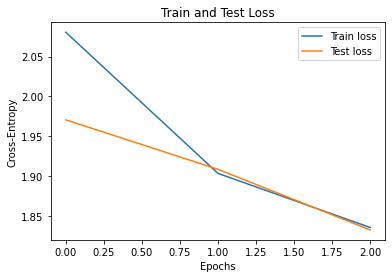

In [10]:
import matplotlib.pyplot as plt

# Plot history: Loss and accuracy
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
#plt.plot(history.history['val_acc'], label='Test accuracy')
plt.title('Train and Test Loss')
plt.ylabel('Cross-Entropy')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()